In [2]:
import torch

需要求导的，可以手动定义

In [3]:
x = torch.randn(3, 4, requires_grad=True)
x

tensor([[-0.0650, -0.5339,  2.6631,  0.5407],
        [-0.3491,  0.0576, -0.7723,  1.2459],
        [ 0.7946, -0.8439, -0.9200, -1.5187]], requires_grad=True)

In [4]:
b = torch.randn(3, 4, requires_grad=True)
t = x + b

In [5]:
y = t.sum()
y

tensor(4.4523, grad_fn=<SumBackward0>)

In [6]:
y.backward()

In [7]:
b.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [8]:
x.requires_grad, y.requires_grad, t.requires_grad

(True, True, True)

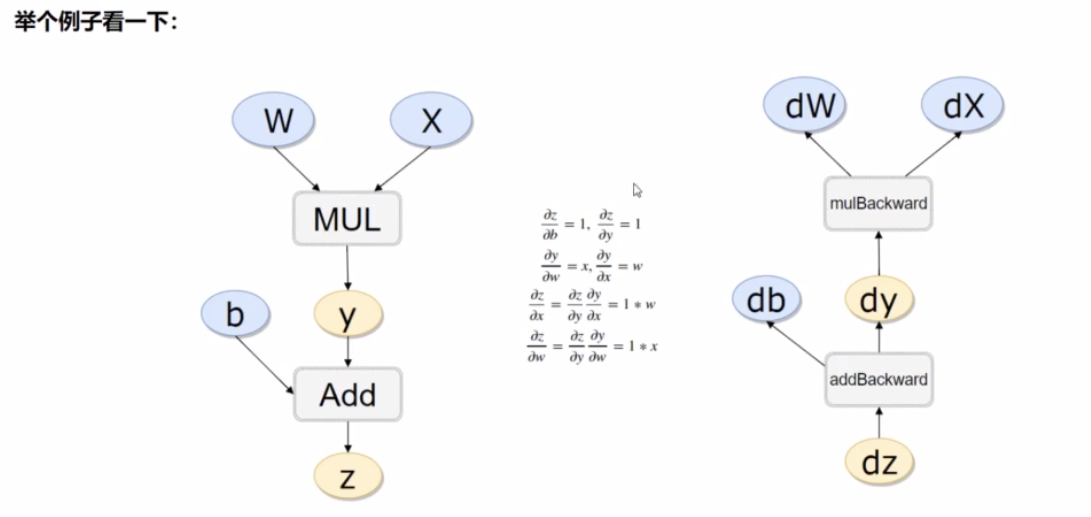

In [9]:
#计算流程
x = torch.rand(1)
b = torch.rand(1, requires_grad=True)
w = torch.rand(1, requires_grad=True)
y = w * x
z = y + b
x , b, w

(tensor([0.3124]),
 tensor([0.8818], requires_grad=True),
 tensor([0.3023], requires_grad=True))

反向传播计算

In [10]:
z.backward(retain_graph=True)#如果不清空会累加起来

In [11]:
w.grad

tensor([0.3124])

In [12]:
b.grad

tensor([1.])

### 做一个线性回归
构造一组输入数据x和其对应的标签y

In [13]:
import numpy as np
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [14]:
y_values = [2*i + 1 for i in range(11)]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [15]:
import torch
import torch.nn as nn

### 线性回归模型
- 其实线性回归就是一个不加激活函数的全连接过程

In [16]:
class LinerRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinerRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [17]:
input_dim = 1
output_dim = 1
model = LinerRegressionModel(input_dim, output_dim)
model

LinerRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

指定好参数和损失函数

In [22]:
epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

训练模型

In [23]:
for epoch in range(epochs):
    epoch += 1
    #注意转换成tensor
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    
    #梯度要清零每次迭代
    optimizer.zero_grad()
    
    #前向传播
    outputs = model(inputs)
    
    #计算损失
    loss = criterion(outputs, labels)
    
    #反向传播
    loss.backward()
    
    #更新权重参数
    optimizer.step()
    if epoch % 50 == 0:
        print("epoch{}, loss{}".format(epoch, loss.item()))

epoch50, loss3.915478011262685e-11
epoch100, loss3.915478011262685e-11
epoch150, loss3.915478011262685e-11
epoch200, loss3.915478011262685e-11
epoch250, loss3.915478011262685e-11
epoch300, loss3.915478011262685e-11
epoch350, loss3.915478011262685e-11
epoch400, loss3.915478011262685e-11
epoch450, loss3.915478011262685e-11
epoch500, loss3.915478011262685e-11
epoch550, loss3.915478011262685e-11
epoch600, loss3.915478011262685e-11
epoch650, loss3.915478011262685e-11
epoch700, loss3.915478011262685e-11
epoch750, loss3.915478011262685e-11
epoch800, loss3.915478011262685e-11
epoch850, loss3.915478011262685e-11
epoch900, loss3.915478011262685e-11
epoch950, loss3.915478011262685e-11
epoch1000, loss3.915478011262685e-11


测试模型预测结果

In [24]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 1.0000117],
       [ 3.00001  ],
       [ 5.000008 ],
       [ 7.0000067],
       [ 9.000005 ],
       [11.000003 ],
       [13.000001 ],
       [14.999999 ],
       [16.999998 ],
       [18.999996 ],
       [20.999994 ]], dtype=float32)

### 模型的保存于读取

In [25]:
torch.save(model.state_dict(), "model.pkl")
model.load_state_dict(torch.load("model.pkl"))

<All keys matched successfully>

### tensor
- scaler数值()
- vector向量[]
- matrix矩阵[[],[]]

In [ ]:
#构建模型
input_size = input_features.shape[1]
hidden_size = 128
output_size = 1
batch_size = 16
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size)
)

cost = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(my_nn.parameters(), lr=0.001)

In [ ]:
#训练模型
#预测-损失-优化清零-反向传播-优化更新